In [185]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
from IPython.display import IFrame
import us

In [186]:
df=pd.read_excel('Datasets/Enhanced_pizza_sell_data_2024-25.xlsx')
#url="https://github.com/Patilanuj/Python_Projects/blob/bc56f8c0e3f810c4ed3dd6b8789af878a6620829/Pizza%20sales%20analysis/Enhanced_pizza_sell_data_2024-25.xlsx"
#df=pd.read_excel(url,engine='openpyxl')
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Topping Density,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
0,ORD001,Domino's,"New York, NY",2024-01-05 18:30:00,2024-01-05 18:45:00,15,Medium,Veg,3,2.5,...,1.200000,January,Online,6.0,9.0,False,6,2,18,30.259434
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14 20:00:00,2024-02-14 20:25:00,25,Large,Non-Veg,4,5.0,...,0.800000,February,Online,12.0,13.0,False,12,3,20,28.186275
2,ORD003,Little Caesars,"Chicago, IL",2024-03-21 12:15:00,2024-03-21 12:35:00,20,Small,Vegan,2,3.0,...,0.666667,March,Online,7.2,12.8,False,2,1,12,28.844221
3,ORD004,Pizza Hut,"Miami, FL",2024-04-10 19:45:00,2024-04-10 20:10:00,25,XL,Cheese Burst,5,4.5,...,1.111111,April,Offline,10.8,14.2,False,20,2,19,29.948454
4,ORD005,Marco's Pizza,"Dallas, TX",2024-05-05 13:00:00,2024-05-05 13:20:00,20,Medium,Non-Veg,3,2.0,...,1.500000,May,Online,4.8,15.2,False,6,3,13,30.286458


#### Hourly crowd

In [187]:
cities=df['Restaurant Name'].value_counts()
print(cities)

Restaurant Name
Domino's          212
Papa John's       204
Little Caesars    199
Marco's Pizza     195
Pizza Hut         194
Name: count, dtype: int64


In [188]:
print('Dataframe Shape:', df.shape)


print('\nDataframe info:')
df.info()

print('\nSummary Statistics of Dataframe:')
df.describe()

Dataframe Shape: (1004, 25)

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Order ID                      1004 non-null   object        
 1   Restaurant Name               1004 non-null   object        
 2   Location                      1004 non-null   object        
 3   Order Time                    1004 non-null   datetime64[ns]
 4   Delivery Time                 1004 non-null   datetime64[ns]
 5   Delivery Duration (min)       1004 non-null   int64         
 6   Pizza Size                    1004 non-null   object        
 7   Pizza Type                    1004 non-null   object        
 8   Toppings Count                1004 non-null   int64         
 9   Distance (km)                 1004 non-null   float64       
 10  Traffic Level                 1004 non-null   objec

,Order Time,Delivery Time,Delivery Duration (min),Toppings Count,Distance (km),Delivery Efficiency (min/km),Topping Density,Estimated Duration (min),Delay (min),Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
count,1004,1004,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,2025-03-27 00:33:24.980079872,2025-03-27 01:02:54.501992192,29.492032,3.362550,4.945618,6.397006,0.714684,11.869482,17.622550,9.468127,2.049801,18.691235,29.492032
min,2024-01-05 18:30:00,2024-01-05 18:45:00,15.000000,1.000000,2.000000,4.166667,0.266667,4.800000,9.000000,1.000000,1.000000,12.000000,26.666667
25%,2024-08-31 13:33:45,2024-08-31 14:05:00,25.000000,3.000000,3.500000,5.000000,0.600000,8.400000,15.200000,6.000000,1.000000,18.000000,28.844221
50%,2025-03-01 07:30:00,2025-03-01 08:12:30,30.000000,3.000000,4.500000,6.000000,0.666667,10.800000,17.800000,6.000000,2.000000,19.000000,29.948454
75%,2025-11-07 00:48:45,2025-11-07 01:18:45,30.000000,4.000000,6.000000,7.142857,0.833333,14.400000,20.400000,12.000000,3.000000,20.000000,30.259434
max,2026-07-07 20:00:00,2026-07-07 20:30:00,50.000000,5.000000,10.000000,12.500000,1.500000,24.000000,30.080000,20.000000,3.000000,21.000000,30.286458
std,NaN,NaN,7.753103,1.135853,1.951463,1.562573,0.203020,4.683510,3.964289,6.233731,0.775696,1.529466,0.859941


In [189]:
df['Order Time'].dtype

dtype('<M8[ns]')

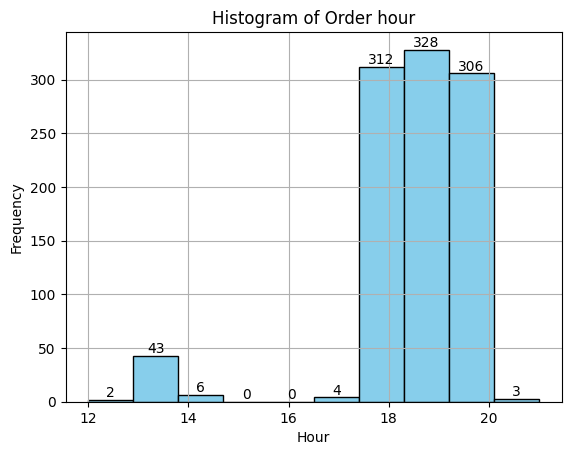

Order Hour
19    328
18    312
20    306
13     43
14      6
17      4
21      3
12      2
Name: count, dtype: int64


In [190]:
import matplotlib.pyplot as plt
# Plot histogram of the 'Age' column
values, bins, bars= plt.hist(df['Order Hour'], color='skyblue', edgecolor='black')
plt.title('Histogram of Order hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.grid(True)
plt.bar_label(bars)
plt.show()

distinct_counts = df['Order Hour'].value_counts()
print(distinct_counts)

#### Relation of Toppings count and Pizza Complexity

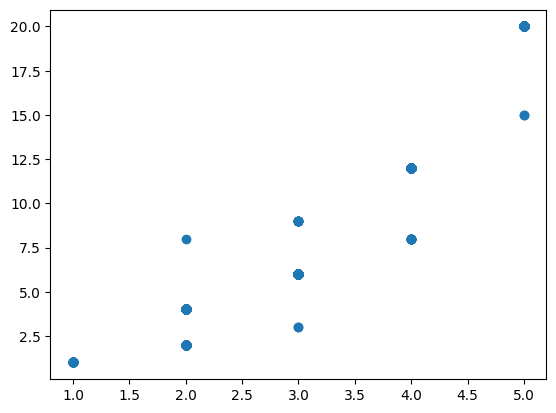

In [191]:
x=df['Toppings Count']
y=df['Pizza Complexity']
plt.scatter(x,y)

In [192]:
df['Traffic Impact'].value_counts()

Traffic Impact
2    398
3    328
1    278
Name: count, dtype: int64

## EDA

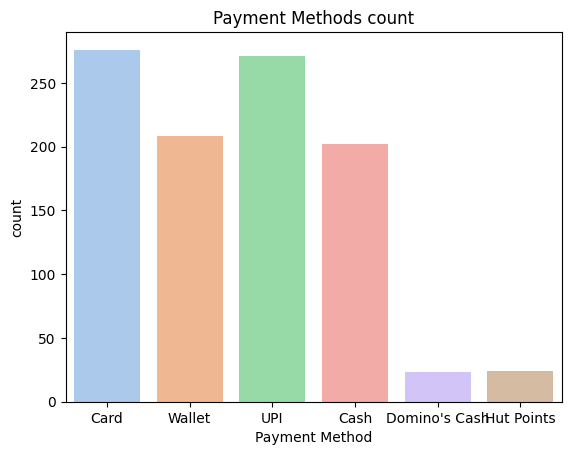

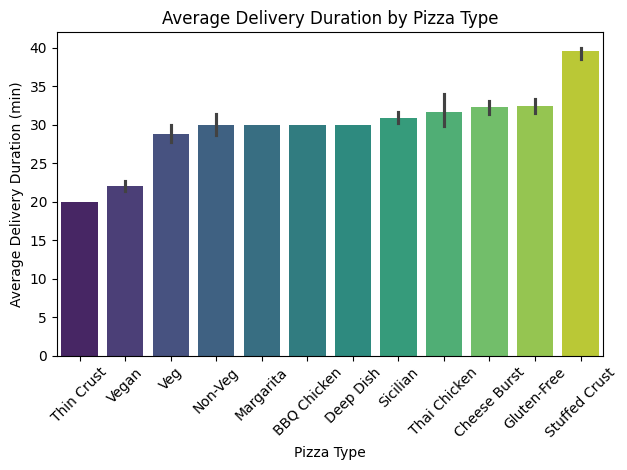

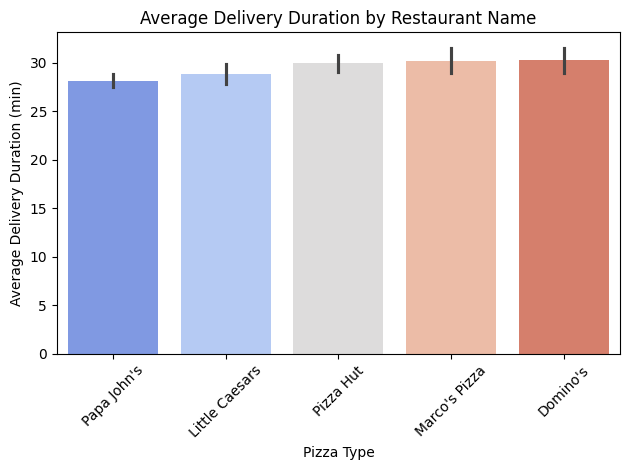

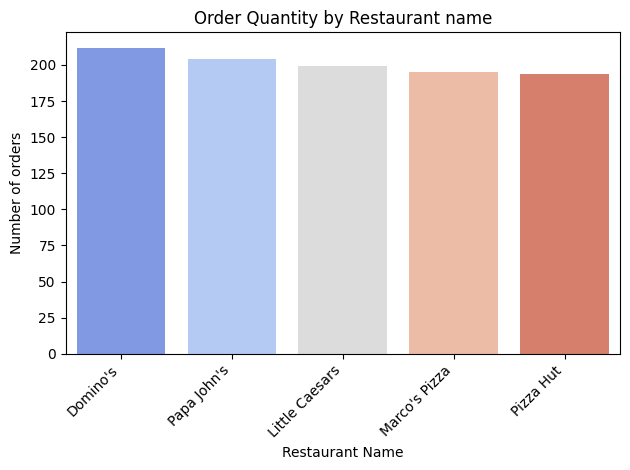

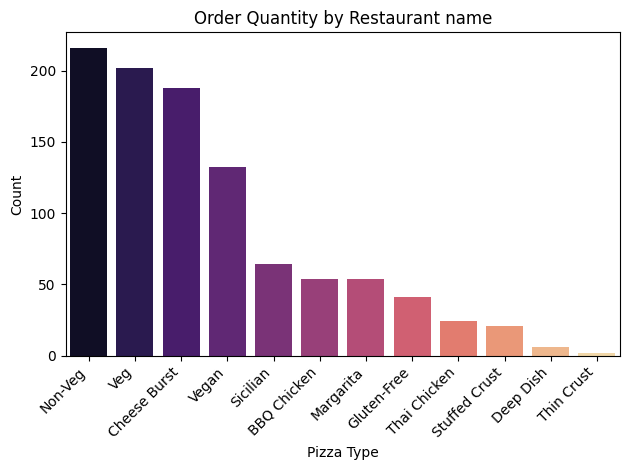

In [193]:
#Payment method and their count
#abs_values=df['Payment Method'].value_counts()
sns.countplot(x=df['Payment Method'], palette='pastel')
plt.title('Payment Methods count')
plt.show()

#Pizza type and time it took to deliver
order = df.groupby('Pizza Type')['Delivery Duration (min)'].mean().sort_values().index
sns.barplot(x='Pizza Type', y='Delivery Duration (min)', data=df, order=order, palette='viridis')
plt.title('Average Delivery Duration by Pizza Type')
plt.xlabel('Pizza Type')
plt.ylabel('Average Delivery Duration (min)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Restaurant_name = df.groupby('Restaurant Name')['Delivery Duration (min)'].mean().sort_values().index
sns.barplot(x='Restaurant Name', y='Delivery Duration (min)', data=df, order=Restaurant_name, palette='coolwarm')
plt.title('Average Delivery Duration by Restaurant Name')
plt.xlabel('Pizza Type')
plt.ylabel('Average Delivery Duration (min)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


"""counts = df['Restaurant Name'].value_counts(ascending=False).values
ax=sns.countplot(x=df['Restaurant Name'], palette='pastel')
plt.title('Order Quantity by Restaurant name')
plt.xlabel('Restaurant Name')
ax.bar_label(container=ax.containers[0], labels=counts)
plt.ylabel('Number of orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()"""

sns.countplot(x='Restaurant Name', data=df, palette='coolwarm', order=df['Restaurant Name'].value_counts().index) # Orders bars by frequency
plt.title('Order Quantity by Restaurant name')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of orders')
#ax.bar_label(ax.containers[0], fmt='%d')
plt.xticks(rotation=45, ha='right') # ha='right' aligns rotated labels nicely
plt.tight_layout() 
plt.show()


sns.countplot(x='Pizza Type', data=df, palette='magma', order=df['Pizza Type'].value_counts().index) # Orders bars by frequency
plt.title('Order Quantity by Restaurant name')
plt.xlabel('Pizza Type')
plt.ylabel('Count')
#ax.bar_label(ax.containers[0], fmt='%d')
plt.xticks(rotation=45, ha='right') # ha='right' aligns rotated labels nicely
plt.tight_layout() 
plt.show()
#yy=df['Restaurant Name'].value_counts()
#sns.barplot(x=df['Restaurant Name'],y=yy, order= yy, palette='coolwarm')


In [194]:
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Topping Density,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
0,ORD001,Domino's,"New York, NY",2024-01-05 18:30:00,2024-01-05 18:45:00,15,Medium,Veg,3,2.5,...,1.200000,January,Online,6.0,9.0,False,6,2,18,30.259434
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14 20:00:00,2024-02-14 20:25:00,25,Large,Non-Veg,4,5.0,...,0.800000,February,Online,12.0,13.0,False,12,3,20,28.186275
2,ORD003,Little Caesars,"Chicago, IL",2024-03-21 12:15:00,2024-03-21 12:35:00,20,Small,Vegan,2,3.0,...,0.666667,March,Online,7.2,12.8,False,2,1,12,28.844221
3,ORD004,Pizza Hut,"Miami, FL",2024-04-10 19:45:00,2024-04-10 20:10:00,25,XL,Cheese Burst,5,4.5,...,1.111111,April,Offline,10.8,14.2,False,20,2,19,29.948454
4,ORD005,Marco's Pizza,"Dallas, TX",2024-05-05 13:00:00,2024-05-05 13:20:00,20,Medium,Non-Veg,3,2.0,...,1.500000,May,Online,4.8,15.2,False,6,3,13,30.286458


In [195]:
df['Traffic Impact'].value_counts()

Traffic Impact
2    398
3    328
1    278
Name: count, dtype: int64

In [196]:
one_hot_data=df.loc[:, df.columns.drop(['Order ID', 'Payment Method', 'Traffic Level', 'Is Peak Hour', 'Restaurant Name', 'Location',	'Order Time', 'Delivery Time', 'Delivery Duration (min)', 'Pizza Size',	'Pizza Type', 'Toppings Count', 'Topping Density', 'Order Month', 'Payment Category', 'Estimated Duration (min)', 'Is Delayed', 'Pizza Complexity', 'Restaurant Avg Time'])]

In [197]:
one_hot_data.head()

,Distance (km),Is Weekend,Delivery Efficiency (min/km),Delay (min),Traffic Impact,Order Hour
0,2.5,False,6.000000,9.0,2,18
1,5.0,False,5.000000,13.0,3,20
2,3.0,False,6.666667,12.8,1,12
3,4.5,False,5.555556,14.2,2,19
4,2.0,True,10.000000,15.2,3,13


### Linear regression to check effectiveness of features on order delay

In [198]:
# Features and target
X = one_hot_data[['Distance (km)', 'Delivery Efficiency (min/km)', 'Traffic Impact', 'Order Hour']]  # must be 2D
y = one_hot_data['Delay (min)']

# Split data into train and test sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R²):", r2_score(y_test, y_pred))

Coefficients: [ 2.54076955  2.20445525 -0.51799644  0.22199371]
Intercept: -12.087190990925937
Mean Squared Error (MSE): 3.398943279107687
R-squared (R²): 0.8094841070251694


### Plotting the outcomes of regression

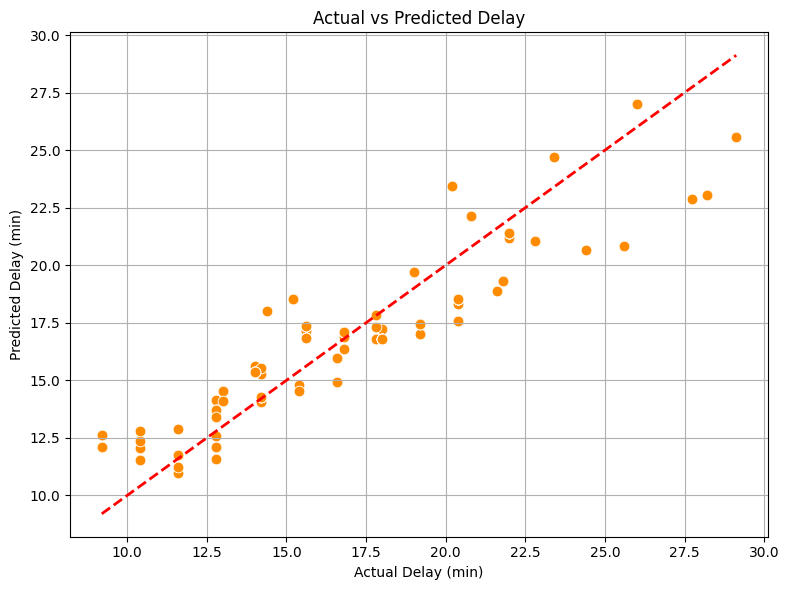

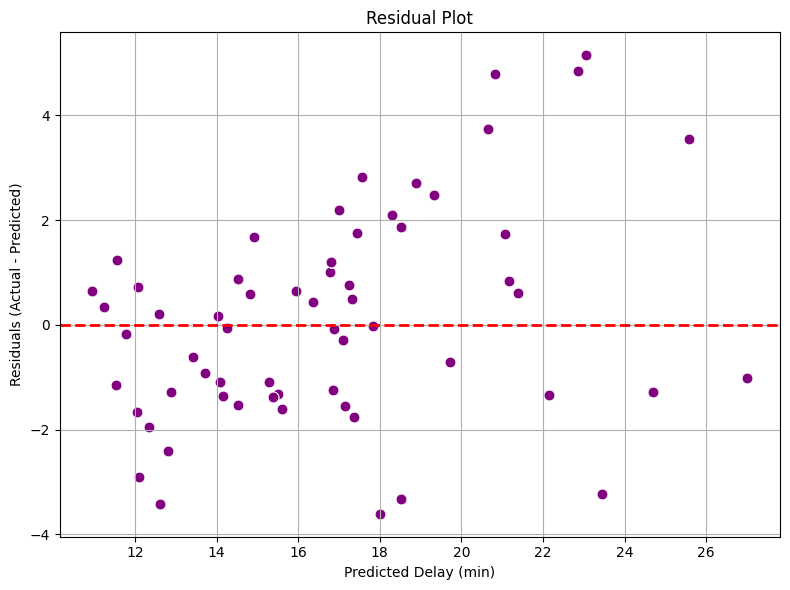

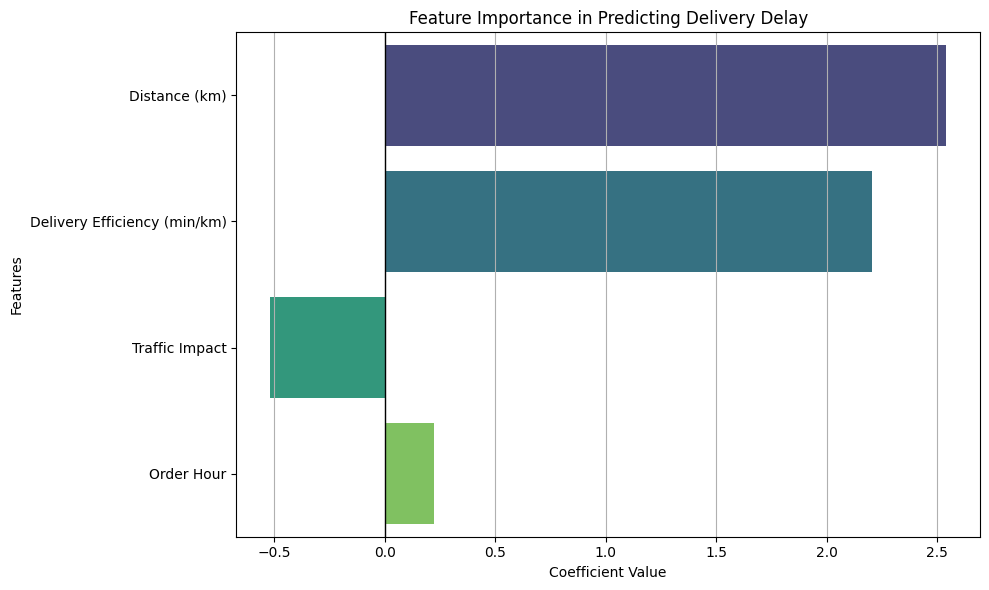

In [199]:
# 1. Plot: Actual vs Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='darkorange', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # ideal fit line
plt.xlabel("Actual Delay (min)")
plt.ylabel("Predicted Delay (min)")
plt.title("Actual vs Predicted Delay")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Plot: Residuals (errors)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='purple', s=60)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Delay (min)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Plot: Coefficients for Feature Importance
feature_names = X.columns
coefficients = model.coef_

plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=feature_names, palette='viridis')
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Delivery Delay")
plt.axvline(0, color='black', linewidth=1)
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()